Questions to Explore:

1. How does customer age and gender influence their purchasing behavior?
2. Are there discernible patterns in sales across different time periods?
3. Which product categories hold the highest appeal among customers?
4. What are the relationships between age, spending, and product preferences?
5. How do customers adapt their shopping habits during seasonal trends?
6. Are there distinct purchasing behaviors based on the number of items bought per transaction?
7. What insights can be gleaned from the distribution of product prices within each category?

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon', 'lightseagreen', 'lightsteelblue', 'palevioletred', 'lightcyan', 'lightpink']

In [88]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [90]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [91]:
df.duplicated().any()

False

Question 1 : How does customer age and gender influence their purchasing behavior?

In [92]:
byGender = df.groupby('Gender')

In [93]:
byGender[['Age','Quantity','Total Amount']].describe().transpose()

Gender                   Female         Male
Age          count   510.000000   490.000000
             mean     41.356863    41.428571
             std      13.568067    13.812208
             min      18.000000    18.000000
             25%      29.000000    30.000000
             50%      42.000000    42.000000
             75%      52.750000    54.000000
             max      64.000000    64.000000
Quantity     count   510.000000   490.000000
             mean      2.545098     2.481633
             std       1.132189     1.133551
             min       1.000000     1.000000
             25%       2.000000     1.000000
             50%       3.000000     2.000000
             75%       4.000000     4.000000
             max       4.000000     4.000000
Total Amount count   510.000000   490.000000
             mean    456.549020   455.428571
             std     554.299371   566.433809
             min      25.000000    25.000000
             25%      60.000000    60.000000
             50%     150.000000   120.000000
             75%     900.000000   900.000000
             max    2000.000000  2000.000000

In [94]:
byGender['Product Category'].value_counts()

Gender  Product Category
Female  Clothing            174
        Electronics         170
        Beauty              166
Male    Clothing            177
        Electronics         172
        Beauty              141
Name: count, dtype: int64

In [95]:
df['Age'].unique()

array([34, 26, 50, 37, 30, 45, 46, 63, 52, 23, 35, 22, 64, 42, 19, 27, 47,
       62, 18, 49, 28, 38, 43, 39, 44, 51, 58, 48, 55, 20, 40, 54, 36, 31,
       21, 57, 25, 56, 29, 61, 32, 41, 59, 60, 33, 53, 24], dtype=int64)

In [96]:
df[df['Age'] >= 41 ]['Product Category'].value_counts()

Product Category
Clothing       194
Electronics    186
Beauty         154
Name: count, dtype: int64

In [97]:
df[df['Age'] <= 41 ]['Product Category'].value_counts()

Product Category
Clothing       167
Electronics    165
Beauty         155
Name: count, dtype: int64

In [98]:
def kategori(x):
    if x < 40 :
        return 'Under 40'
    else :
        return 'Over 40'

In [99]:
df['ageCategory'] = df['Age'].apply(lambda x:kategori(x))

In [100]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,ageCategory
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Under 40
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Under 40
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Over 40
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Under 40
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Under 40


<Axes: xlabel='Product Category', ylabel='count'>

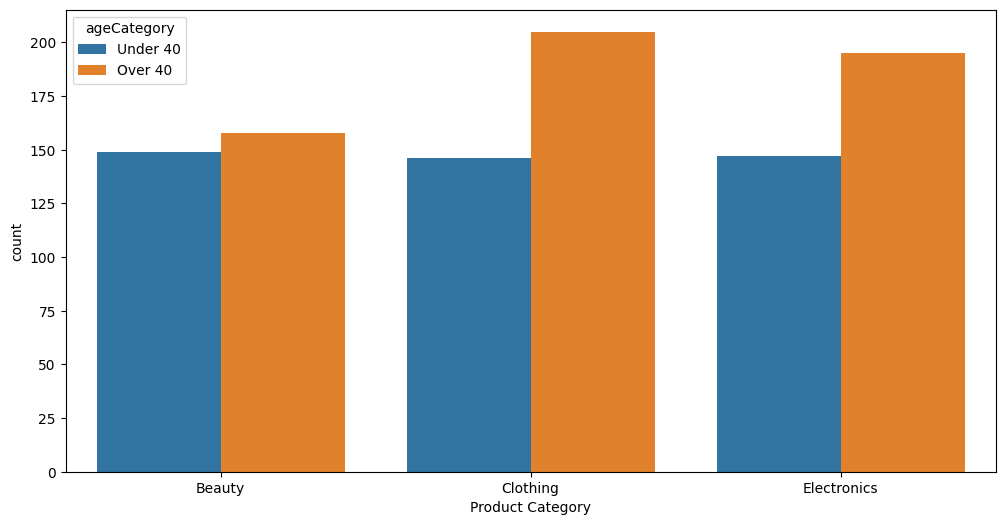

In [101]:
plt.figure(figsize=(12,6))
sns.countplot(x='Product Category', hue='ageCategory', data=df)

<Axes: xlabel='Product Category', ylabel='count'>

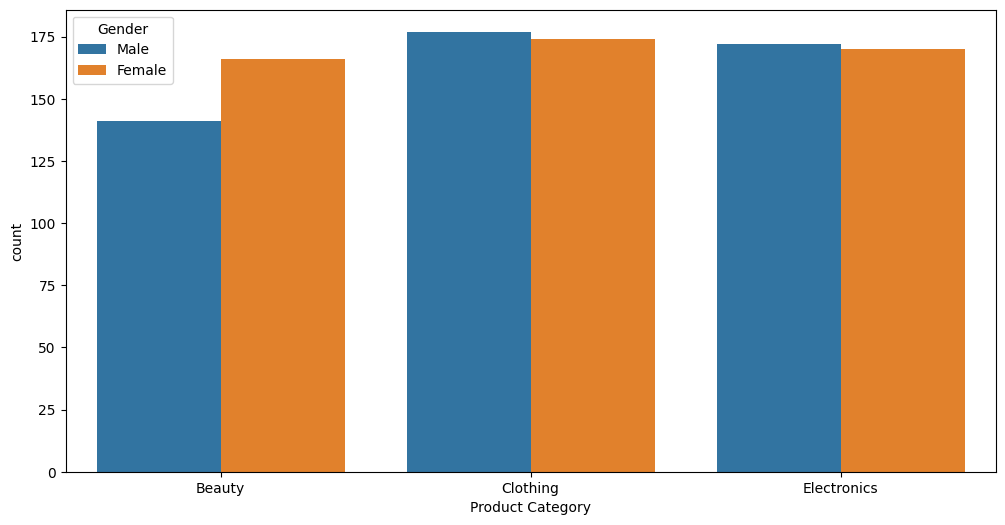

In [102]:
plt.figure(figsize=(12,6))
sns.countplot(x='Product Category', hue='Gender', data=df)

Question 2 : Are there discernible patterns in sales across different time periods?

In [103]:
type(df['Date'].iloc[0])

str

In [104]:
df['Date'] = pd.to_datetime(df['Date'])


In [105]:
df['Date'].iloc[0].dayofweek

4

In [106]:
byDate = df.groupby('Date')

In [107]:
df['Date'].iloc[0].date()

datetime.date(2023, 11, 24)

In [108]:
df['Daydate'] = df['Date'].apply(lambda x:x.date())
df['Month'] = df['Date'].apply(lambda x:x.month)

In [109]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,ageCategory,Daydate,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Under 40,2023-11-24,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Under 40,2023-02-27,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Over 40,2023-01-13,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Under 40,2023-05-21,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Under 40,2023-05-06,5


Text(0.5, 1.0, 'Days Sales Report')

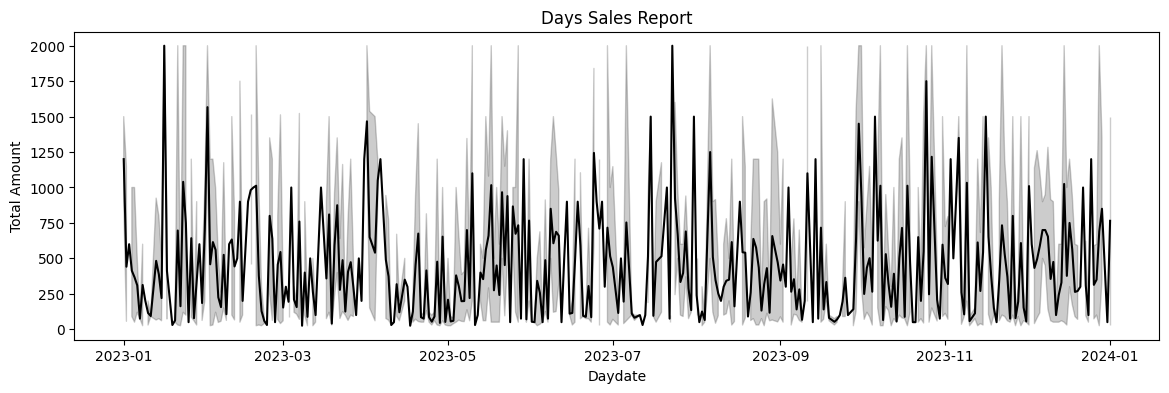

In [110]:
#Penjualan harian
plt.figure(figsize=(14,4))
sns.lineplot(x=df['Daydate'].sort_values(), y='Total Amount', data=df,color='black',sizes=15)
plt.title('Days Sales Report')

In [111]:
#Penjualan bulanan
byMonth = df.groupby('Month')
monthly_sales = byMonth['Total Amount'].sum()
monthly_sales

Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64

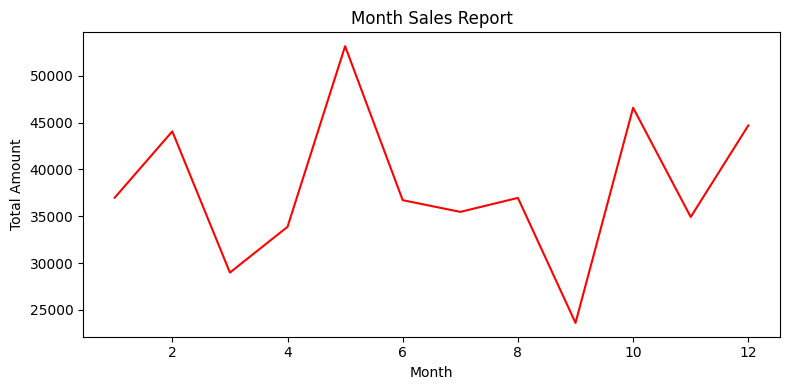

In [112]:
plt.figure(figsize=(8,4))
monthly_sales.plot(kind='line',color='red')
plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.title('Month Sales Report')
plt.tight_layout()

Question 3 : Which product categories hold the highest appeal among customers?

In [113]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='count'>

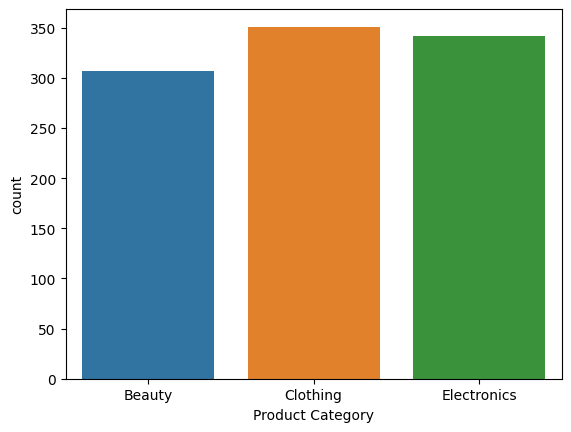

In [114]:
sns.countplot(x='Product Category', data=df)

Question 4 : What are the relationships between age, spending, and product preferences?

In [115]:
#Korelasi
age_total_correlation = df[['Age','Total Amount']].corr()
age_total_correlation

,Age,Total Amount
Age,1.000000,-0.060568
Total Amount,-0.060568,1.000000


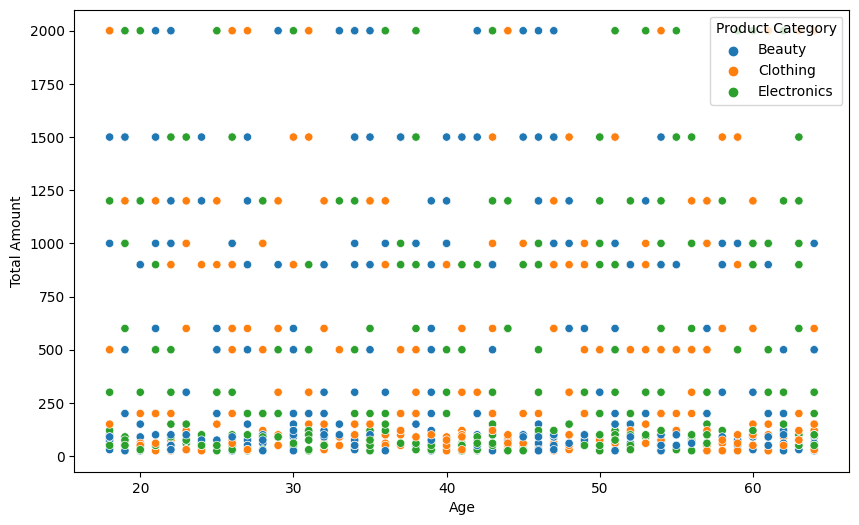

In [116]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='Age', y = 'Total Amount', hue='Product Category')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Product Category')

Question 5 : How do customers adapt their shopping habits during seasonal trends?

In [117]:
holiday_season = df[df['Month'].isin([6,11,12])]
non_holiday_season = df[~df['Month'].isin([6,11,12])]

In [118]:
average_holiday_spend = holiday_season['Total Amount'].mean()
average_non_holiday_spend = non_holiday_season['Total Amount'].mean()

In [119]:
average_holiday_spend


472.8658536585366

In [120]:
average_non_holiday_spend

450.4973474801061

Text(0, 0.5, 'Average')

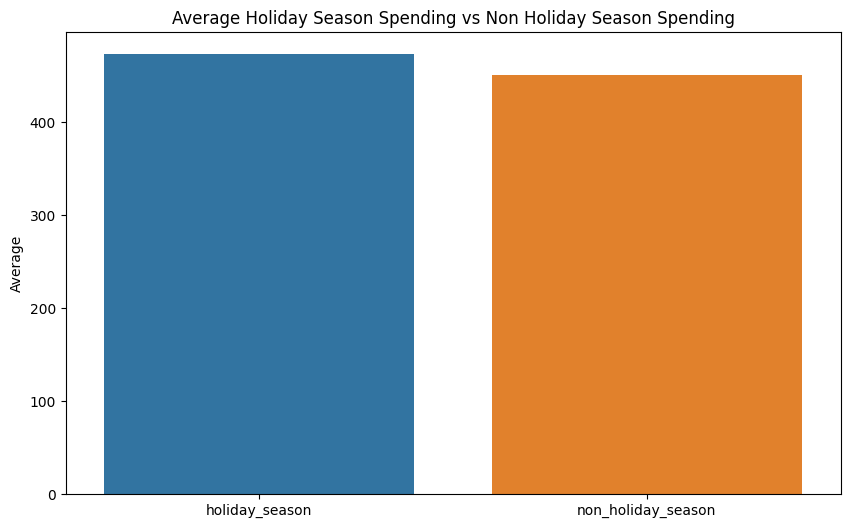

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['holiday_season', 'non_holiday_season'], y=[average_holiday_spend, average_non_holiday_spend])
plt.title('Average Holiday Season Spending vs Non Holiday Season Spending')
plt.ylabel('Average')

In [122]:
holiday_season['Product Category'].value_counts()

Product Category
Electronics    91
Clothing       80
Beauty         75
Name: count, dtype: int64

In [123]:
non_holiday_season['Product Category'].value_counts()

Product Category
Clothing       271
Electronics    251
Beauty         232
Name: count, dtype: int64

Question 6 : Are there distinct purchasing behaviors based on the number of items bought per transaction?

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   ageCategory       1000 non-null   object        
 10  Daydate           1000 non-null   object        
 11  Month             1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 93.9+ KB


In [125]:
df['Quantity_by_Group'] = pd.cut(df['Quantity'],bins=[0,1,2,3,4],labels=['less','enough','Average', 'Above Average'])

In [126]:
QuantityGroup = df.groupby('Quantity_by_Group')

In [127]:
QuantityGroup['Total Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Quantity_by_Group,,,,,,,,
less,253.0,177.094862,190.738329,25.0,30.0,50.0,300.0,500.0
enough,243.0,333.539095,382.527244,50.0,55.0,100.0,600.0,1000.0
Average,241.0,598.692946,569.652172,75.0,90.0,150.0,900.0,1500.0
Above Average,263.0,706.692015,746.655193,100.0,120.0,200.0,1200.0,2000.0


In [128]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,ageCategory,Daydate,Month,Quantity_by_Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Under 40,2023-11-24,11,Average
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Under 40,2023-02-27,2,enough
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Over 40,2023-01-13,1,less
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Under 40,2023-05-21,5,less
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Under 40,2023-05-06,5,enough


In [129]:
QuantityGroup['Total Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Quantity_by_Group,,,,,,,,
less,253.0,177.094862,190.738329,25.0,30.0,50.0,300.0,500.0
enough,243.0,333.539095,382.527244,50.0,55.0,100.0,600.0,1000.0
Average,241.0,598.692946,569.652172,75.0,90.0,150.0,900.0,1500.0
Above Average,263.0,706.692015,746.655193,100.0,120.0,200.0,1200.0,2000.0


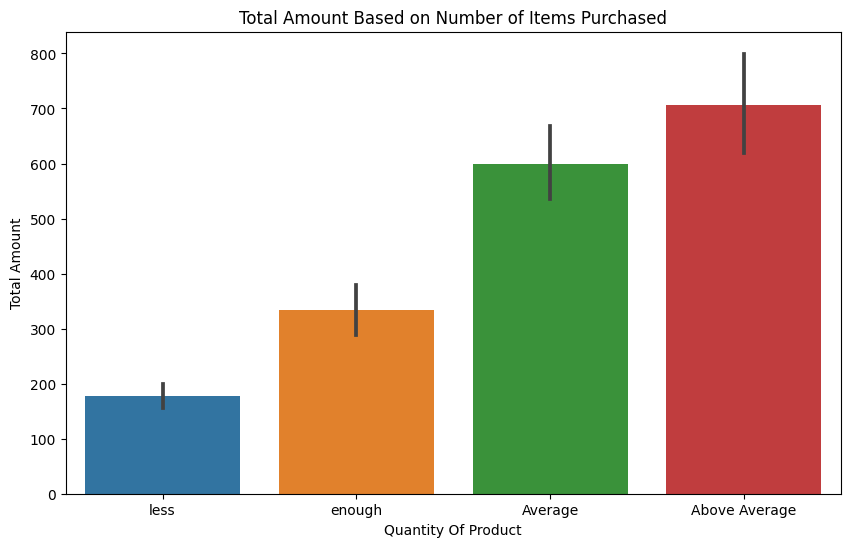

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Quantity_by_Group', y='Total Amount', order=['less','enough','Average', 'Above Average'])
plt.title('Total Amount Based on Number of Items Purchased')
plt.xlabel('Quantity Of Product')
plt.ylabel('Total Amount')
plt.show()

Question 7 : What insights can be gleaned from the distribution of product prices within each category?

In [131]:
byProduct = df.groupby("Product Category")

In [137]:
Price_per_product = byProduct['Price per Unit']
total_price_per_product = Price_per_product.sum()

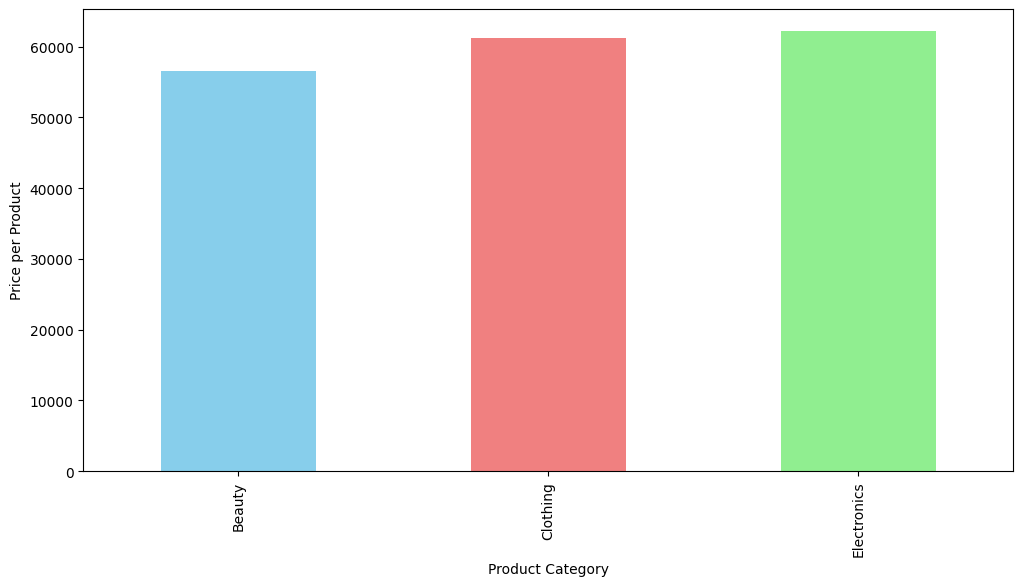

Product Category
Beauty         56505
Clothing       61175
Electronics    62210
Name: Price per Unit, dtype: int64


In [143]:
plt.figure(figsize=(12,6))
total_price_per_product.plot(kind='bar',color=colors)
plt.xlabel("Product Category")
plt.ylabel("Price per Product")
plt.show()
print(total_price_per_product)